<a href="https://colab.research.google.com/github/Pardeepan/64018_psubram3/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_data,train_data.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [4]:
train_labels[0]

1

In [5]:
len(train_labels)

25000

In [6]:
len(train_labels)

25000

In [7]:
test_labels[0]

0

In [8]:
max([max(sequence) for sequence in test_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [12]:
#Data Vectorization
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
#label vectorization
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [16]:
#Building model using relu and compiling it
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6811 - loss: 0.6212 - val_accuracy: 0.8550 - val_loss: 0.4174
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8861 - loss: 0.3631 - val_accuracy: 0.8832 - val_loss: 0.3200
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9214 - loss: 0.2557 - val_accuracy: 0.8882 - val_loss: 0.2859
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9367 - loss: 0.2001 - val_accuracy: 0.8828 - val_loss: 0.2935
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9439 - loss: 0.1686 - val_accuracy: 0.8779 - val_loss: 0.3096
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9570 - loss: 0.1365 - val_accuracy: 0.8850 - val_loss: 0.2835
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9667 - loss: 0.1171 - val_accuracy: 0.8851 - val_loss: 0.2940
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9724 - loss: 0.1009 - val_accuracy: 0.8751 - v

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

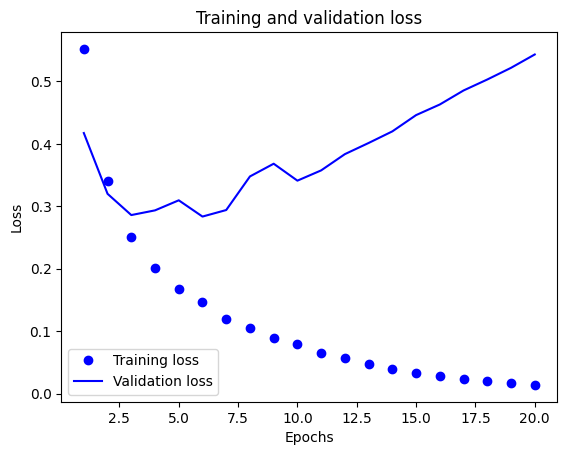

In [21]:
#Plotting the training loss vs validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

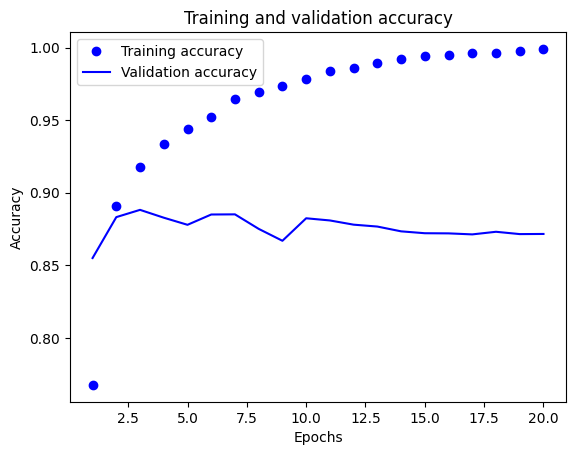

In [22]:
#Plotting training accuracy vs validatition accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7282 - loss: 0.5605
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9015 - loss: 0.2864
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9254 - loss: 0.2141
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9361 - loss: 0.1811
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.2897


In [24]:
results

[0.2888040542602539, 0.8860399723052979]

In [25]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.20673797],
       [0.99810493],
       [0.8371271 ],
       ...,
       [0.07179032],
       [0.06511712],
       [0.4686889 ]], dtype=float32)

In [26]:
model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val1 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val1 = y_train[:10000]
partial_y_train = y_train[10000:]


history1_layer = model_1_layer.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val1, y_val1))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.7164 - loss: 0.5984 - val_accuracy: 0.8593 - val_loss: 0.4213
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8915 - loss: 0.3697 - val_accuracy: 0.8733 - val_loss: 0.3475
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9137 - loss: 0.2878 - val_accuracy: 0.8847 - val_loss: 0.3056
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9247 - loss: 0.2383 - val_accuracy: 0.8872 - val_loss: 0.2887
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9379 - loss: 0.2080 - val_accuracy: 0.8858 - val_loss: 0.2853
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9452 - loss: 0.1808 - val_accuracy: 0.8853 - val_loss: 0.2875
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9525 - loss: 0.1629 - val_accuracy: 0.8831 - val_loss: 0.2915
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9516 - loss: 0.1532 - val_accuracy: 0.8862 - v

In [27]:
history_dict1 = history1_layer.history
history_dict1.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

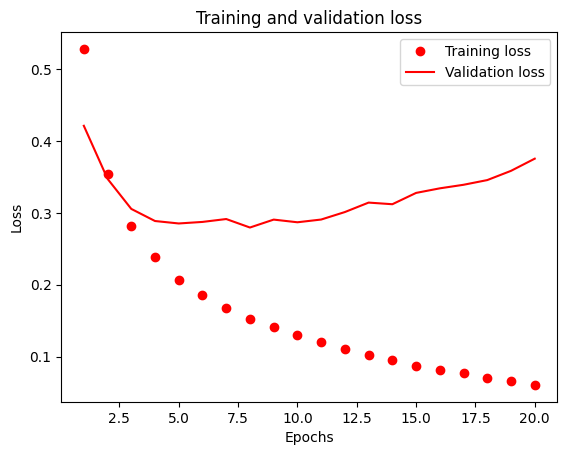

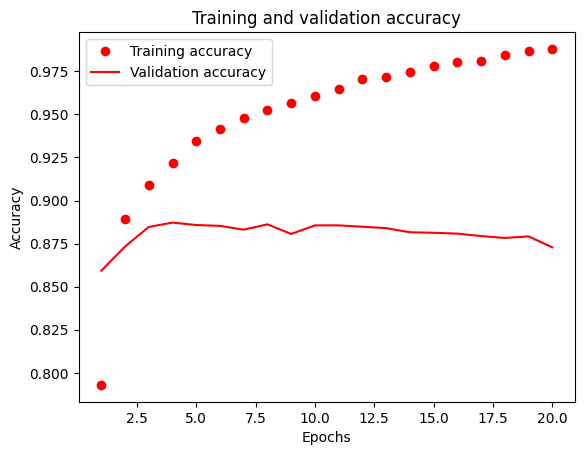

In [28]:
import matplotlib.pyplot as plt
history_dict1 = history1_layer.history
loss_value1 = history_dict1["loss"]
val_loss_value1 = history_dict1["val_loss"]
epochs1 = range(1, len(loss_value1) + 1)

#Plotting graph of Training and Validation loss
plt.plot(epochs1, loss_value1, "ro", label="Training loss")
plt.plot(epochs1, val_loss_value1, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph of Training and Validation Accuracy
plt.clf()
accuracy1 = history_dict1["accuracy"]
val_accuracy1 = history_dict1["val_accuracy"]
plt.plot(epochs1, accuracy1, "ro", label="Training accuracy")
plt.plot(epochs1, val_accuracy1, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [29]:
model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1_layer.fit(x_train, y_train, epochs=5, batch_size=512)
result_1_layer = model_1_layer.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7415 - loss: 0.5424
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9048 - loss: 0.2927
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9202 - loss: 0.2357
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9265 - loss: 0.2061
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9382 - loss: 0.1814
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8858 - loss: 0.2839


In [30]:
print(result_1_layer)

#The loss on the test set is 0.2778, and the accuracy is 88.85%.

[0.28184446692466736, 0.8876399993896484]


In [31]:
model_1_layer.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.27810204],
       [0.9997605 ],
       [0.7863883 ],
       ...,
       [0.13692543],
       [0.09721168],
       [0.61300015]], dtype=float32)

In [32]:
model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val3 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val3 = y_train[:10000]
partial_y_train = y_train[10000:]

history_3_layers = model_3_layers.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3, y_val3))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6635 - loss: 0.6302 - val_accuracy: 0.8623 - val_loss: 0.4219
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8881 - loss: 0.3648 - val_accuracy: 0.8836 - val_loss: 0.3152
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9227 - loss: 0.2466 - val_accuracy: 0.8682 - val_loss: 0.3219
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9332 - loss: 0.1965 - val_accuracy: 0.8816 - val_loss: 0.2947
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9473 - loss: 0.1594 - val_accuracy: 0.8882 - val_loss: 0.2822
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9631 - loss: 0.1238 - val_accuracy: 0.8870 - val_loss: 0.2937
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9687 - loss: 0.1040 - val_accuracy: 0.8755 - val_loss: 0.3267
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9744 - loss: 0.0873 - val_accuracy: 0.8753 - v

In [33]:
history_dict_3 = history_3_layers.history
history_dict_3.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

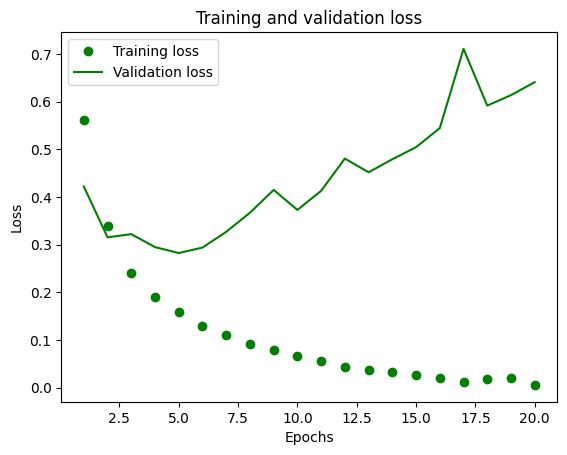

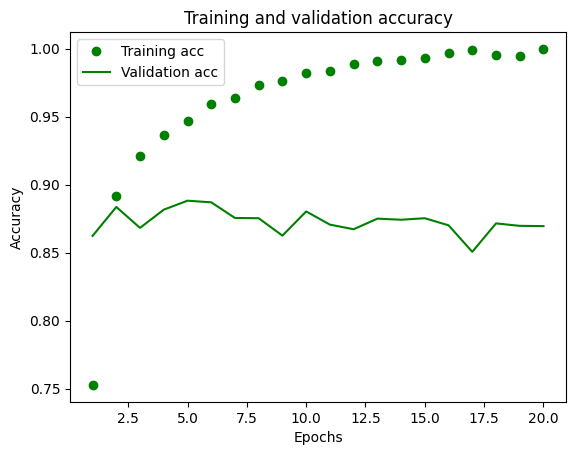

In [34]:
loss_val3 = history_dict_3["loss"]
val_loss_val3 = history_dict_3["val_loss"]
epochs3 = range(1, len(loss_val3) + 1)
plt.plot(epochs3, loss_val3, "go", label="Training loss")
plt.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy3 = history_dict_3["accuracy"]
val_accuracy3 = history_dict_3["val_accuracy"]
plt.plot(epochs3, accuracy3, "go", label="Training acc")
plt.plot(epochs3, val_accuracy3, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3_layers.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3_layers.fit(x_train, y_train, epochs=3, batch_size=512)
results_3_layers = model_3_layers.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6770 - loss: 0.6332
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8907 - loss: 0.3257
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9195 - loss: 0.2245
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8656 - loss: 0.3314


In [36]:
print(results_3_layers)

[0.3260330259799957, 0.8672800064086914]


In [37]:
model_3_layers.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.37547025],
       [0.99891275],
       [0.9890443 ],
       ...,
       [0.19173409],
       [0.1914591 ],
       [0.7925559 ]], dtype=float32)

In [38]:
model_32_units = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32_units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val_32 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_32 = y_train[:10000]
partial_y_train = y_train[10000:]


history_32_units = model_32_units.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_32, y_val_32))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6712 - loss: 0.6093 - val_accuracy: 0.8322 - val_loss: 0.4061
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8812 - loss: 0.3260 - val_accuracy: 0.8621 - val_loss: 0.3327
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9092 - loss: 0.2387 - val_accuracy: 0.8729 - val_loss: 0.3072
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9339 - loss: 0.1825 - val_accuracy: 0.8751 - val_loss: 0.3071
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9545 - loss: 0.1349 - val_accuracy: 0.8592 - val_loss: 0.3867
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9534 - loss: 0.1270 - val_accuracy: 0.8846 - val_loss: 0.3112
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9723 - loss: 0.0865 - val_accuracy: 0.8816 - val_loss: 0.3360
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9785 - loss: 0.0737 - val_accuracy: 0.8806 - v

In [39]:
history_dict_32 = history_32_units.history
history_dict_32.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

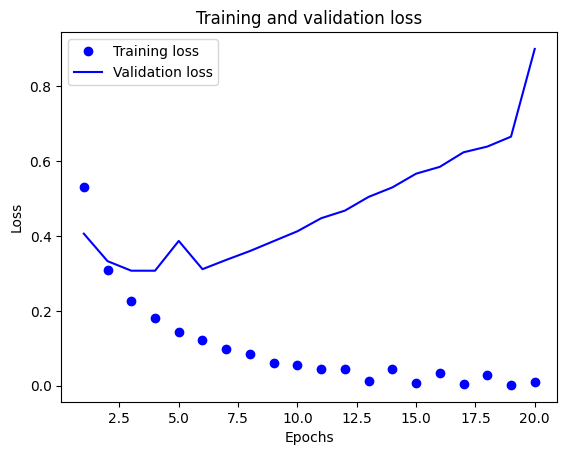

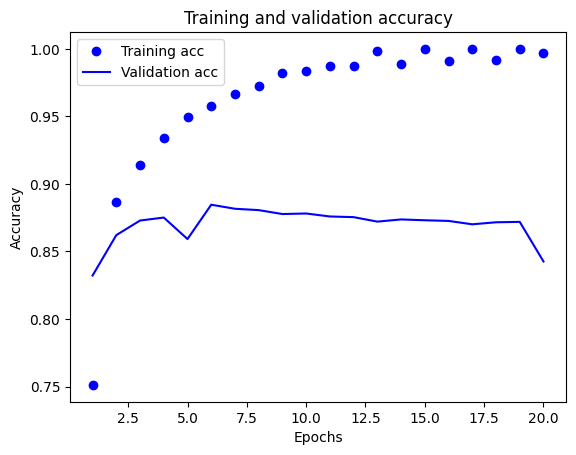

In [40]:
loss_value_32 = history_dict_32["loss"]
val_loss_value_32 = history_dict_32["val_loss"]
epochs_32 = range(1, len(loss_value_32) + 1)
plt.plot(epochs_32, loss_value_32, "bo", label="Training loss")
plt.plot(epochs_32, val_loss_value_32, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy_32 = history_dict_32["accuracy"]
val_accuracy_32 = history_dict_32["val_accuracy"]
plt.plot(epochs_32, accuracy_32, "bo", label="Training acc")
plt.plot(epochs_32, val_accuracy_32, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
history_32_units = model_32_units.fit(x_train, y_train, epochs=3, batch_size=512)
results_32_units = model_32_units.evaluate(x_test, y_test)
results_32_units

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9473 - loss: 0.2463
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9639 - loss: 0.1133
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9771 - loss: 0.0760
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8652 - loss: 0.4043


[0.4011080861091614, 0.8665599822998047]

In [42]:
model_32_units.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.02573252],
       [0.99998534],
       [0.5480723 ],
       ...,
       [0.00979932],
       [0.02333886],
       [0.68163997]], dtype=float32)

In [43]:
model_64_units = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64_units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_64 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_64 = y_train[:10000]
partial_y_train = y_train[10000:]

history_64 = model_64_units.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_64, y_val_64))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.6512 - loss: 0.6017 - val_accuracy: 0.8685 - val_loss: 0.3600
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8874 - loss: 0.3157 - val_accuracy: 0.8884 - val_loss: 0.2871
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9193 - loss: 0.2267 - val_accuracy: 0.8650 - val_loss: 0.3254
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9382 - loss: 0.1771 - val_accuracy: 0.8455 - val_loss: 0.3903
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9398 - loss: 0.1637 - val_accuracy: 0.8801 - val_loss: 0.3027
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9568 - loss: 0.1256 - val_accuracy: 0.8778 - val_loss: 0.3249
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9679 - loss: 0.0998 - val_accuracy: 0.8829 - val_loss: 0.3344
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9718 - loss: 0.0860 - val_accuracy: 0.8332 - 

In [44]:
history_dict_64 = history_64.history
history_dict_64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

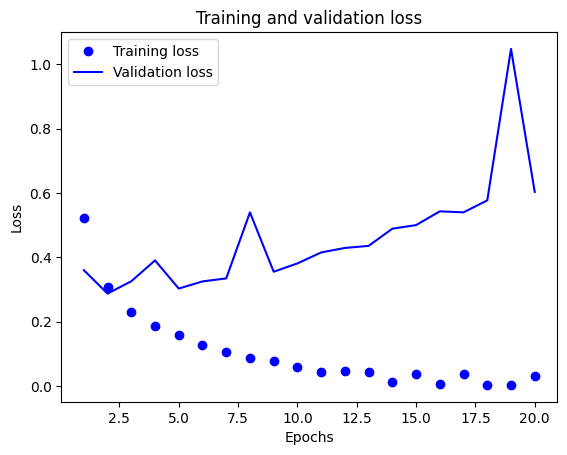

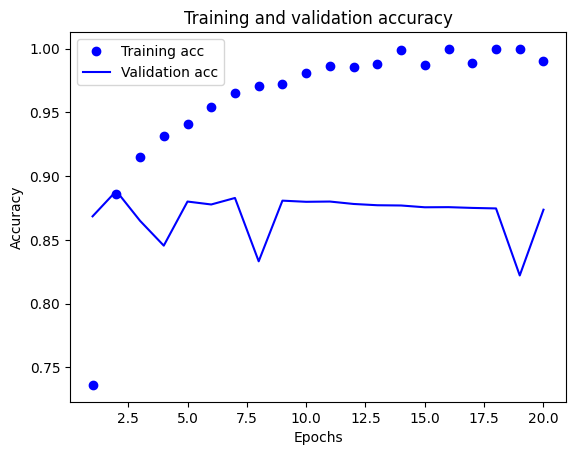

In [45]:
loss_value64 = history_dict_64["loss"]
val_loss_value64 = history_dict_64["val_loss"]
epochs_64 = range(1, len(loss_value64) + 1)
plt.plot(epochs_64, loss_value64, "bo", label="Training loss")
plt.plot(epochs_64, val_loss_value64, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
accuracy_64 = history_dict_64["accuracy"]
val_accuracy_64 = history_dict_64["val_accuracy"]
plt.plot(epochs_64, accuracy_64, "bo", label="Training acc")
plt.plot(epochs_64, val_accuracy_64, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [46]:
history_64 = model_64_units.fit(x_train, y_train, epochs=3, batch_size=512)
results_64_units = model_64_units.evaluate(x_test, y_test)
results_64_units

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9454 - loss: 0.2108
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9698 - loss: 0.0991
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9820 - loss: 0.0620
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8641 - loss: 0.4049


[0.39651817083358765, 0.8678399920463562]

In [47]:
model_64_units.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.0480094 ],
       [0.9999997 ],
       [0.4658258 ],
       ...,
       [0.05174194],
       [0.06017439],
       [0.86283445]], dtype=float32)

In [48]:
model_128units = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_128 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_128 = y_train[:10000]
partial_y_train = y_train[10000:]

history_128 = model_128units.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_128, y_val_128))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.6314 - loss: 0.6301 - val_accuracy: 0.8621 - val_loss: 0.3615
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.8768 - loss: 0.3200 - val_accuracy: 0.8870 - val_loss: 0.2815
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9171 - loss: 0.2188 - val_accuracy: 0.8842 - val_loss: 0.2925
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9251 - loss: 0.1939 - val_accuracy: 0.8860 - val_loss: 0.3076
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9400 - loss: 0.1559 - val_accuracy: 0.8872 - val_loss: 0.3025
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9753 - loss: 0.0813 - val_accuracy: 0.8845 - val_loss: 0.3121
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9856 - loss: 0.0530 - val_accuracy: 0.8845 - val_loss: 0.3414
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.9898 - loss: 0.0415 - val_accuracy: 0.8822 -

In [49]:
history_dict_128 = history_128.history
history_dict_128.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

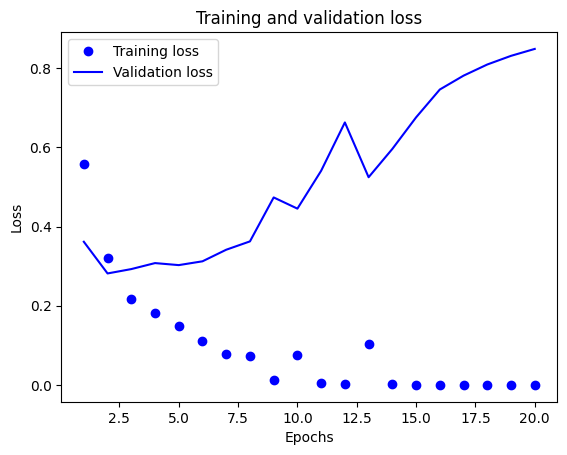

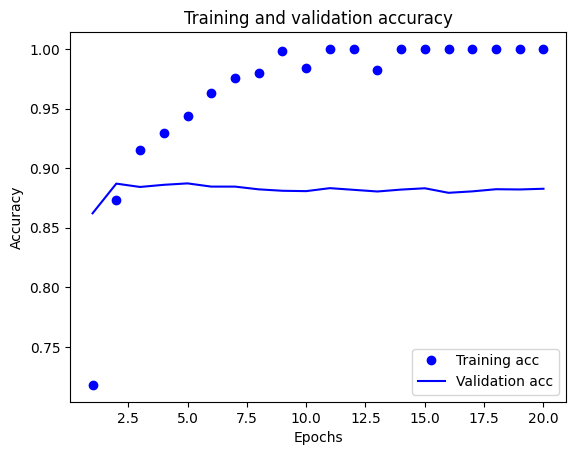

In [50]:
loss_value128 = history_dict_128["loss"]
val_loss_value128 = history_dict_128["val_loss"]
epochs_128 = range(1, len(loss_value128) + 1)
plt.plot(epochs_128, loss_value128, "bo", label="Training loss")
plt.plot(epochs_128, val_loss_value128, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy_128 = history_dict_128["accuracy"]
val_accuracy_128 = history_dict_128["val_accuracy"]
plt.plot(epochs_128, accuracy_128, "bo", label="Training acc")
plt.plot(epochs_128, val_accuracy_128, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
history_128 = model_128units.fit(x_train, y_train, epochs=2, batch_size=512)
results_128_units = model_128units.evaluate(x_test, y_test)
results_128_units

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9303 - loss: 0.2993
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9704 - loss: 0.0899
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8564 - loss: 0.4396


[0.4302583634853363, 0.8579999804496765]

In [52]:
model_128units.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.03385768],
       [1.        ],
       [0.9768075 ],
       ...,
       [0.31125492],
       [0.06801374],
       [0.9265763 ]], dtype=float32)

In [53]:
MSE_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation of model
MSE_model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation of model
x_val_MSE = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_MSE = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit

history_MSE = MSE_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_MSE, y_val_MSE))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6759 - loss: 0.2200 - val_accuracy: 0.8057 - val_loss: 0.1527
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8765 - loss: 0.1171 - val_accuracy: 0.8809 - val_loss: 0.0992
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9147 - loss: 0.0780 - val_accuracy: 0.8856 - val_loss: 0.0893
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9344 - loss: 0.0592 - val_accuracy: 0.8874 - val_loss: 0.0844
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9470 - loss: 0.0496 - val_accuracy: 0.8853 - val_loss: 0.0854
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9560 - loss: 0.0408 - val_accuracy: 0.8832 - val_loss: 0.0837
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9667 - loss: 0.0343 - val_accuracy: 0.8817 - val_loss: 0.0850
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9684 - loss: 0.0323 - val_accuracy: 0.8675 - v

In [54]:
historydict_MSE = history_MSE.history
historydict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

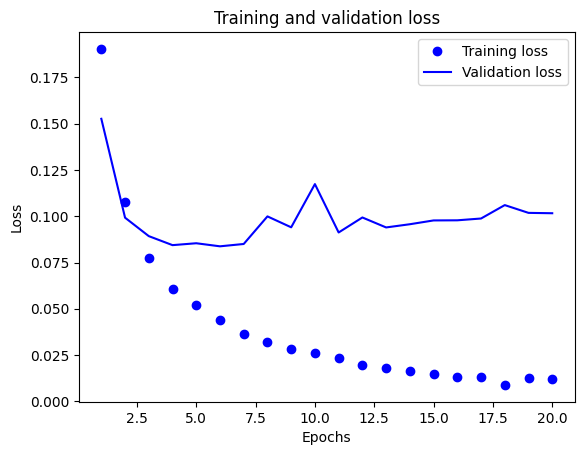

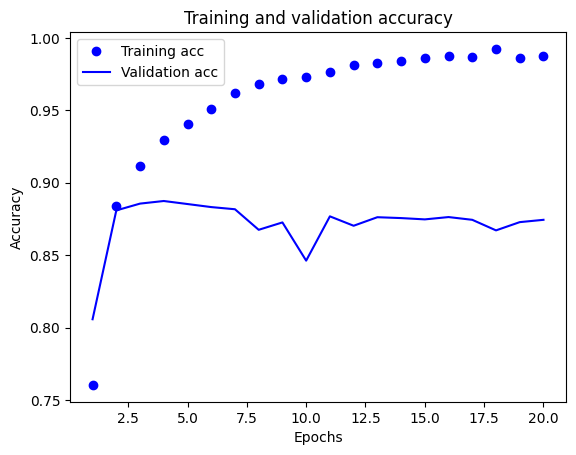

In [55]:
import matplotlib.pyplot as plt
loss_value_MSE = historydict_MSE["loss"]
val_loss_value_MSE = historydict_MSE["val_loss"]
epochs_MSE = range(1, len(loss_value_MSE) + 1)
plt.plot(epochs_MSE, loss_value_MSE, "bo", label="Training loss")
plt.plot(epochs_MSE, val_loss_value_MSE, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_MSE = historydict_MSE["accuracy"]
val_acc_MSE = historydict_MSE["val_accuracy"]
plt.plot(epochs_MSE, acc_MSE, "bo", label="Training acc")
plt.plot(epochs_MSE, val_acc_MSE, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [56]:
MSE_model.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = MSE_model.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9465 - loss: 0.0454
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9592 - loss: 0.0360
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9649 - loss: 0.0322
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9716 - loss: 0.0271
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9712 - loss: 0.0264
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9737 - loss: 0.0247
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9809 - loss: 0.0188
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9782 - loss: 0.0208
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8545 - loss: 0.1243


[0.12150118499994278, 0.856440007686615]

In [57]:
MSE_model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.01586813],
       [0.9999909 ],
       [0.999445  ],
       ...,
       [0.75893724],
       [0.00893678],
       [0.9225745 ]], dtype=float32)

In [58]:
tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

tanh.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

x_val_tanh = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_tanh = y_train[:10000]
partial_y_train = y_train[10000:]


historytanh_model = tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_tanh, y_val_tanh))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7295 - loss: 0.1981 - val_accuracy: 0.8550 - val_loss: 0.1340
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8861 - loss: 0.1164 - val_accuracy: 0.8531 - val_loss: 0.1185
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9048 - loss: 0.0912 - val_accuracy: 0.8843 - val_loss: 0.0970
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9178 - loss: 0.0775 - val_accuracy: 0.8838 - val_loss: 0.0913
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9287 - loss: 0.0671 - val_accuracy: 0.8894 - val_loss: 0.0866
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9425 - loss: 0.0562 - val_accuracy: 0.8801 - val_loss: 0.0883
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9440 - loss: 0.0535 - val_accuracy: 0.8881 - val_loss: 0.0837
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9513 - loss: 0.0483 - val_accuracy: 0.8833 - v

In [59]:
historydict_tanh = historytanh_model.history
historydict_tanh.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

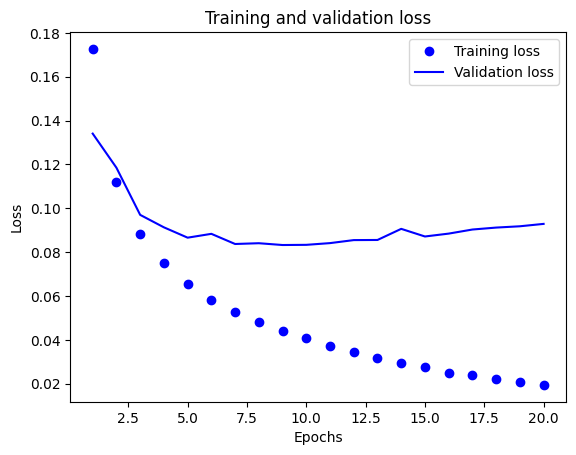

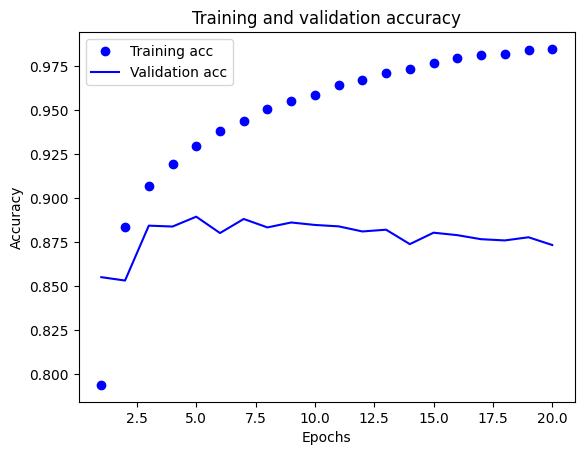

In [60]:
loss_value_tanh= historydict_tanh["loss"]
val_loss_value_tanh = historydict_tanh["val_loss"]
epochs_tanh = range(1, len(loss_value_tanh) + 1)
plt.plot(epochs_tanh, loss_value_tanh, "bo", label="Training loss")
plt.plot(epochs_tanh, val_loss_value_tanh, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc_tanh = historydict_tanh["accuracy"]
val_acc_tanh = historydict_tanh["val_accuracy"]
plt.plot(epochs_tanh, acc_tanh, "bo", label="Training acc")
plt.plot(epochs_tanh, val_acc_tanh, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [61]:
tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9456 - loss: 0.0460
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9523 - loss: 0.0412
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9628 - loss: 0.0349
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9646 - loss: 0.0341
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9679 - loss: 0.0309
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9722 - loss: 0.0290
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9729 - loss: 0.0277
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9759 - loss: 0.0247
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - loss: 0.1085


[0.1068594753742218, 0.8656399846076965]

In [62]:
adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_adam = x_train[:10000]
partial_x_train = x_train[10000:]

y_adam = y_train[:10000]
partial_y_train = y_train[10000:]


historyadam = adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_adam, y_adam))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6596 - loss: 0.6326 - val_accuracy: 0.8593 - val_loss: 0.3886
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9004 - loss: 0.3065 - val_accuracy: 0.8869 - val_loss: 0.2830
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9411 - loss: 0.1784 - val_accuracy: 0.8876 - val_loss: 0.2827
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9620 - loss: 0.1229 - val_accuracy: 0.8853 - val_loss: 0.3069
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9794 - loss: 0.0831 - val_accuracy: 0.8811 - val_loss: 0.3444
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9880 - loss: 0.0552 - val_accuracy: 0.8799 - val_loss: 0.3877
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9943 - loss: 0.0376 - val_accuracy: 0.8768 - val_loss: 0.4356
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9979 - loss: 0.0230 - val_accuracy: 0.8739 - v

In [63]:
historydict_adam = historyadam.history
historydict_adam.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

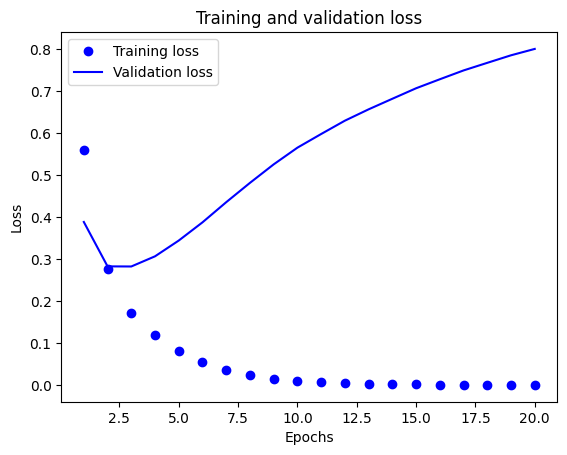

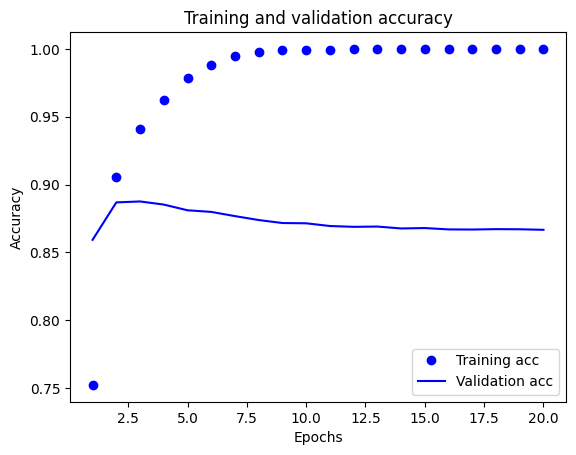

In [64]:
loss_value_adam = historydict_adam["loss"]
val_loss_value_adam = historydict_adam["val_loss"]
epochs_adam = range(1, len(loss_value_adam) + 1)
plt.plot(epochs_adam, loss_value_adam, "bo", label="Training loss")
plt.plot(epochs_adam, val_loss_value_adam, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_adam = historydict_adam["accuracy"]
val_acc_adam = historydict_adam["val_accuracy"]
plt.plot(epochs_adam, acc_adam, "bo", label="Training acc")
plt.plot(epochs_adam, val_acc_adam, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [65]:
adam.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = adam.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9360 - loss: 0.2792
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9637 - loss: 0.1176
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9808 - loss: 0.0672
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9918 - loss: 0.0393
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.5922


[0.5853615403175354, 0.8577200174331665]

In [66]:
#Regularization

from tensorflow.keras import regularizers
regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_regularization = regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_regularization = history_regularization.history
historydict_regularization.keys()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.6956 - loss: 0.6662 - val_accuracy: 0.8590 - val_loss: 0.4861
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8877 - loss: 0.4330 - val_accuracy: 0.8774 - val_loss: 0.3920
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9120 - loss: 0.3358 - val_accuracy: 0.8849 - val_loss: 0.3517
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9218 - loss: 0.2886 - val_accuracy: 0.8836 - val_loss: 0.3462
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9302 - loss: 0.2598 - val_accuracy: 0.8842 - val_loss: 0.3385
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9407 - loss: 0.2376 - val_accuracy: 0.8821 - val_loss: 0.3464
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9476 - loss: 0.2190 - val_accuracy: 0.8855 - val_loss: 0.3393
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9535 - loss: 0.2113 - val_accuracy: 0.8850 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

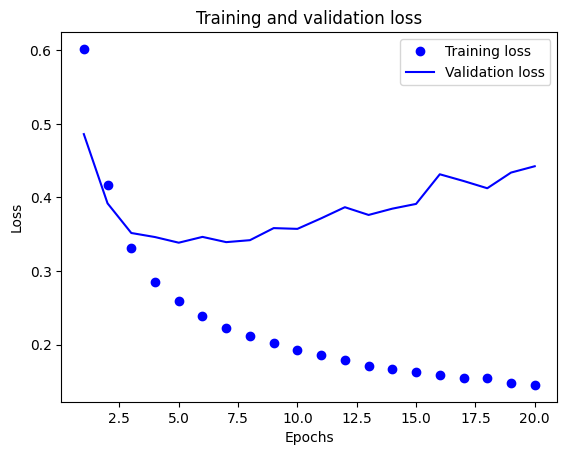

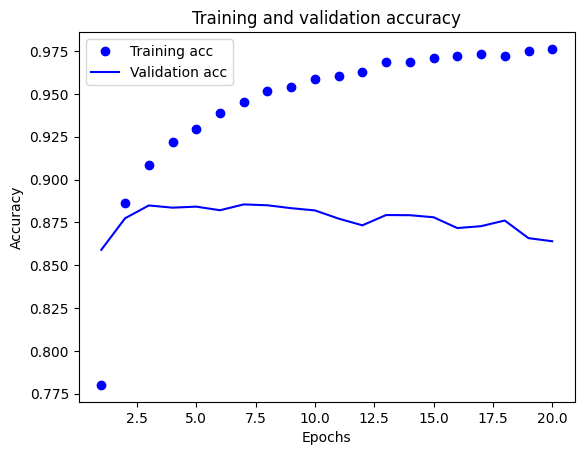

In [67]:
loss_valu = historydict_regularization["loss"]
val_loss_value_r = historydict_regularization["val_loss"]
epochs_r = range(1, len(loss_valu) + 1)
plt.plot(epochs_r, loss_valu, "bo", label="Training loss")
plt.plot(epochs_r, val_loss_value_r, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc_r = historydict_regularization["accuracy"]
val_acc_r = historydict_regularization["val_accuracy"]
plt.plot(epochs_r, acc_r, "bo", label="Training acc")
plt.plot(epochs_r, val_acc_r, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [68]:
regularization.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization = regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9350 - loss: 0.2588
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9523 - loss: 0.2021
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9542 - loss: 0.1945
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9557 - loss: 0.1879
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9541 - loss: 0.1888
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9627 - loss: 0.1724
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9633 - loss: 0.1728
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9616 - loss: 0.1719
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8648 - loss: 0.4348


[0.42694592475891113, 0.8697999715805054]

In [69]:
#Dropout
from tensorflow.keras import regularizers
Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_Dropout = Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_Dropout = history_Dropout.history
historydict_Dropout.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5385 - loss: 0.6875 - val_accuracy: 0.8120 - val_loss: 0.6287
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6632 - loss: 0.6217 - val_accuracy: 0.8564 - val_loss: 0.4795
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7480 - loss: 0.5409 - val_accuracy: 0.8729 - val_loss: 0.3852
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8013 - loss: 0.4502 - val_accuracy: 0.8767 - val_loss: 0.3289
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8409 - loss: 0.3942 - val_accuracy: 0.8878 - val_loss: 0.3033
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8663 - loss: 0.3470 - val_accuracy: 0.8874 - val_loss: 0.2930
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8844 - loss: 0.3114 - val_accuracy: 0.8843 - val_loss: 0.2898
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8968 - loss: 0.2785 - val_accuracy: 0.8899 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

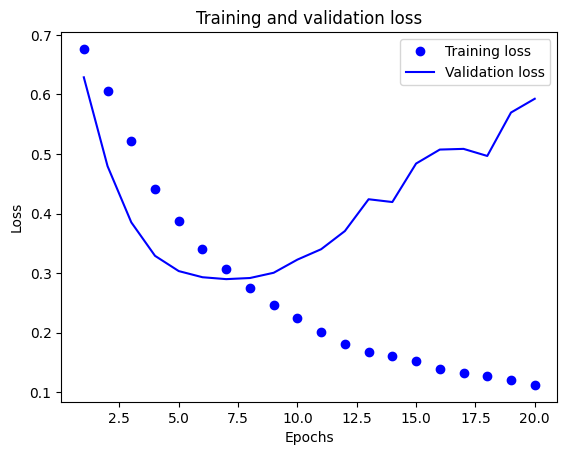

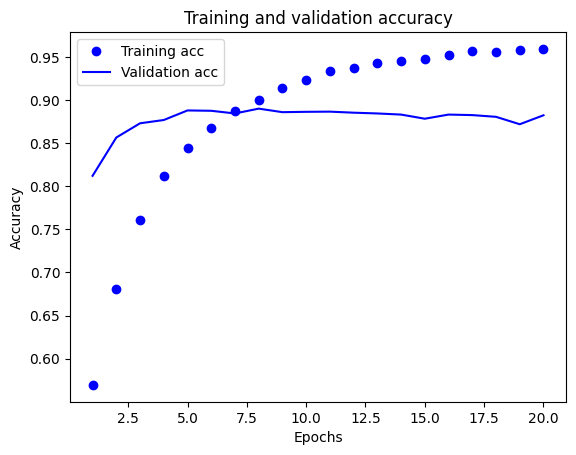

In [70]:
loss_val = historydict_Dropout["loss"]
val_loss_val_d = historydict_Dropout["val_loss"]
epochs_d = range(1, len(loss_val) + 1)
plt.plot(epochs_d, loss_val, "bo", label="Training loss")
plt.plot(epochs_d, val_loss_val_d, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_d = historydict_Dropout["accuracy"]
val_acc_d = historydict_Dropout["val_accuracy"]
plt.plot(epochs_d, acc_d, "bo", label="Training acc")
plt.plot(epochs_d, val_acc_d, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [71]:
Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9040 - loss: 0.3190
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9113 - loss: 0.2660
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9215 - loss: 0.2114
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9283 - loss: 0.2006
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9326 - loss: 0.1867
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9367 - loss: 0.1714
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9377 - loss: 0.1729
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9408 - loss: 0.1581
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8682 - loss: 0.5006


[0.4915551543235779, 0.8683199882507324]

In [72]:
#Training model with hyper tuned parameters

from tensorflow.keras import regularizers
Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_Hyper = Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dictHyper = history_Hyper.history
history_dictHyper.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.5296 - loss: 0.2594 - val_accuracy: 0.8087 - val_loss: 0.2178
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6787 - loss: 0.2234 - val_accuracy: 0.8501 - val_loss: 0.1614
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7759 - loss: 0.1768 - val_accuracy: 0.8649 - val_loss: 0.1229
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8345 - loss: 0.1429 - val_accuracy: 0.8815 - val_loss: 0.1029
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8786 - loss: 0.1148 - val_accuracy: 0.8847 - val_loss: 0.0975
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9015 - loss: 0.1006 - val_accuracy: 0.8854 - val_loss: 0.0990
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9148 - loss: 0.0871 - val_accuracy: 0.8852 - val_loss: 0.1005
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9308 - loss: 0.0751 - val_accuracy: 0.8853 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

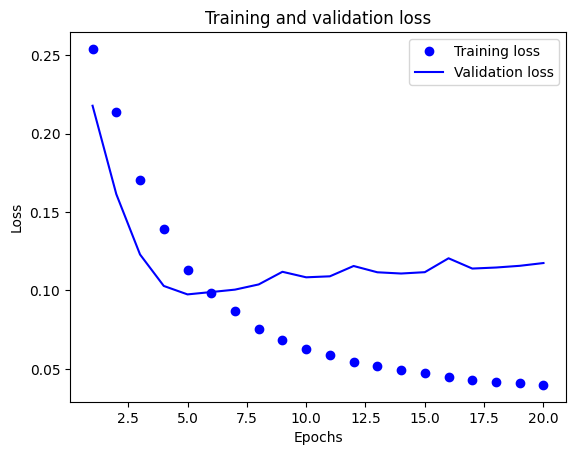

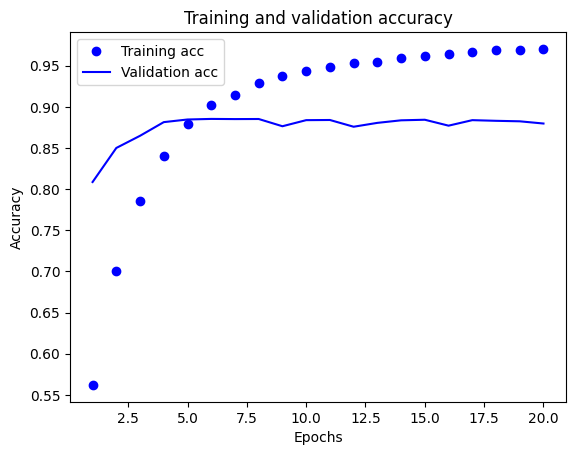

In [73]:
loss_va_h = history_dictHyper["loss"]
val_loss_va_h = history_dictHyper["val_loss"]
epochs_h = range(1, len(loss_va_h) + 1)
plt.plot(epochs_h, loss_va_h, "bo", label="Training loss")
plt.plot(epochs_h, val_loss_va_h, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_h = history_dictHyper["accuracy"]
val_acc_h = history_dictHyper["val_accuracy"]
plt.plot(epochs_h, acc_h, "bo", label="Training acc")
plt.plot(epochs_h, val_acc_h, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [74]:
Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = Hyper.evaluate(x_test, y_test)
results_Hyper


Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9271 - loss: 0.0748
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9373 - loss: 0.0662
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9473 - loss: 0.0587
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9473 - loss: 0.0574
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9487 - loss: 0.0563
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9539 - loss: 0.0532
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9550 - loss: 0.0514
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9559 - loss: 0.0504
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8768 - loss: 0.1168


[0.11367490887641907, 0.8804399967193604]

In [75]:
#Summary
Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
Models_Loss
Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

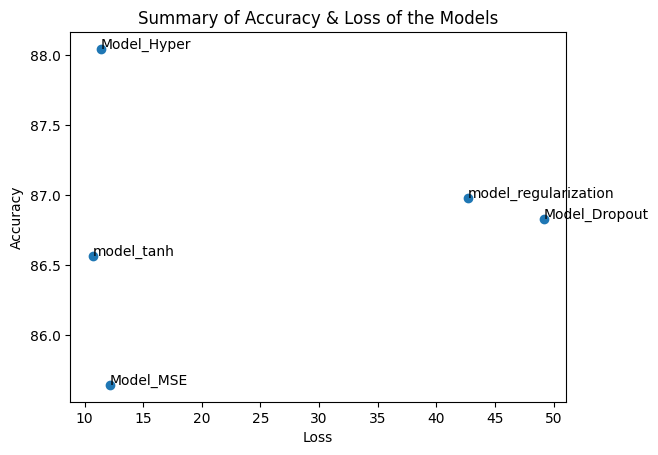

In [76]:
#Compilation

fig, ax = plt.subplots()
ax.scatter(Models_Loss,Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (Models_Loss[i],Models_Accuracy[i] ))
plt.title("Summary of Accuracy & Loss of the Models")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()